In [1]:
import sys
import os
import datetime
import numpy as np
import pandas as pd

import matplotlib
import sklearn

import matplotlib.pyplot as plt
from cycler import cycler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
inpDir='../../input'
outDir='../../output'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE=0.2

In [3]:
data_df=pd.read_csv("breast_cancer_mod.csv")
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [5]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,0.820738,0.383909,0.0,1.0,1.0,1.0,1.0
mean texture,569.0,0.880492,0.324671,0.0,1.0,1.0,1.0,1.0
mean perimeter,569.0,0.827768,0.377914,0.0,1.0,1.0,1.0,1.0
mean area,569.0,0.954306,0.209005,0.0,1.0,1.0,1.0,1.0
mean smoothness,569.0,0.811951,0.391095,0.0,1.0,1.0,1.0,1.0
mean compactness,569.0,0.910369,0.285904,0.0,1.0,1.0,1.0,1.0
mean concavity,569.0,0.917399,0.275520,0.0,1.0,1.0,1.0,1.0
mean concave points,569.0,0.899824,0.300498,0.0,1.0,1.0,1.0,1.0
mean symmetry,569.0,0.831283,0.374831,0.0,1.0,1.0,1.0,1.0
mean fractal dimension,569.0,0.927944,0.258809,0.0,1.0,1.0,1.0,1.0


In [6]:
data_df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

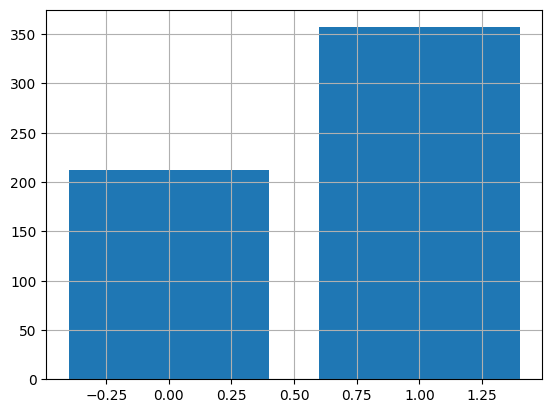

In [7]:
fig,ax = plt.subplots()
ax.bar(data_df.target.value_counts().index,data_df.target.value_counts().values)
ax.grid()

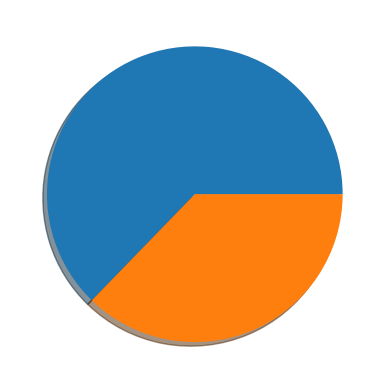

In [8]:
fig,ax = plt.subplots()
ax.pie(data_df.target.value_counts(),shadow=True);

In [9]:
features_df=data_df.drop('target',axis=1)
labels_df=data_df['target']
features_df.shape,labels_df.shape

((569, 30), (569,))

In [10]:
X_train,X_test,y_train,y_test = train_test_split(features_df,labels_df,test_size=TEST_SIZE,
                                                 random_state=RANDOM_STATE,stratify=labels_df)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [11]:
X_train['total']=X_train.astype(np.int64).sum(axis=1)
X_test['total']=X_test.astype(np.int64).sum(axis=1)

X_train['target']=y_train
X_test['target']=y_test

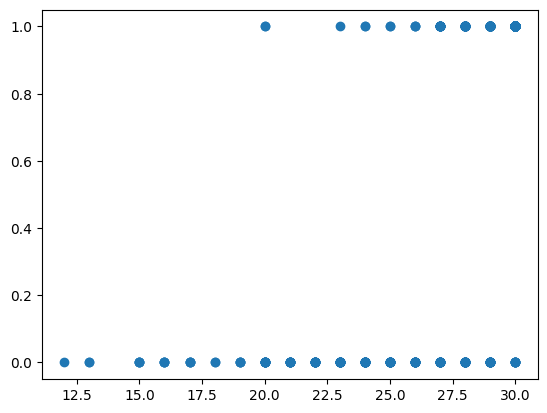

In [12]:
plt.scatter(X_train['total'],X_train['target']);

,total,target,count
0,12,0,1
1,13,0,2
2,15,0,4
3,16,0,4
4,17,0,4
5,18,0,2
6,19,0,4
7,20,0,10
8,20,1,2
9,21,0,9


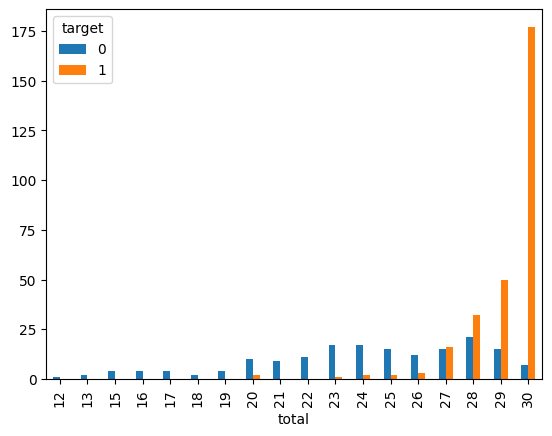

In [13]:
temp_df = X_train.groupby(['total','target']).agg({'target':'count'})
temp_df.columns=['count']
temp_df.reset_index(inplace=True)
temp_df.pivot(index='total',columns='target',values='count').plot(kind='bar')
temp_df

<Axes: xlabel='total'>

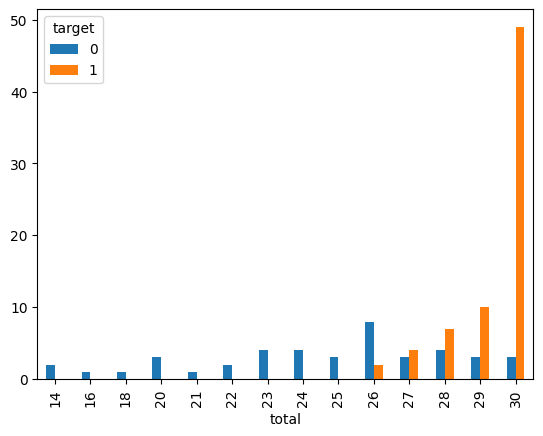

In [14]:
temp_df = X_test.groupby(['total','target']).agg({'target':'count'})
temp_df.columns=['count']
temp_df.reset_index(inplace=True)
temp_df.pivot(index='total',columns='target',values='count').plot(kind='bar')

In [20]:
X_train.shape

(455, 33)

In [19]:
accuracy={}
# loop over the all columns
for b in range(X_train.shape[1]-1):
    X_train['pred']=X_train['total']>=b
    accuracy[b]=accuracy_score(X_train['pred'],X_train['target'])
accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473,
 31: 0.37362637362637363}

In [21]:
best_b=max(accuracy,key=accuracy.get)
best_b

27

In [23]:
print('Highest accuracy is: {0:4.2f} %'.format(accuracy[best_b] *100))

Highest accuracy is: 85.05 %


In [24]:
# Using best b calculate accuracy on test set

X_test['y_pred'] = X_test['total'] >= best_b

test_accuracy = accuracy_score(X_test['y_pred'], X_test['target'])

print ('Accuracy of testing is: {0:4.2f} %'.format(test_accuracy*100))

Accuracy of testing is: 86.84 %


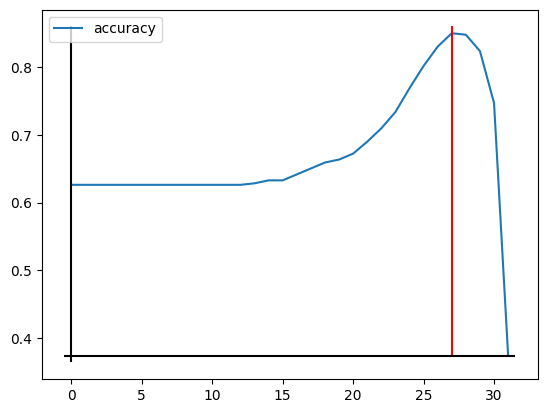

In [25]:
# plot results
ax = pd.DataFrame([accuracy], index = ['accuracy']).T.plot()

ax.vlines( x=best_b, ymin=min(accuracy.values()), ymax=accuracy[best_b]+0.01, colors='r')

ax.vlines( x = 0, ymin=min(accuracy.values())-0.01, ymax=accuracy[best_b]+0.01, colors='k')

ax.hlines( y=min(accuracy.values()), xmin=min(accuracy.keys())-0.5, xmax=max(accuracy.keys())+0.5, colors='k');